<a href="https://colab.research.google.com/github/Dysuza/Datascience/blob/main/Prjct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = pd.read_excel("Project.xlsx")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [5]:
print(data.isnull().sum())


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [7]:
print(data.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [8]:
null_rows = (data.isnull().sum())
print(null_rows)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [10]:
data_cleaned = data.dropna()

In [11]:
data = data.dropna(axis=1)

In [12]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [13]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
data['days_stayed'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
print(data[['Date of Admission', 'Discharge Date', 'days_stayed']].head())


  Date of Admission Discharge Date  days_stayed
0        2024-01-31     2024-02-02            2
1        2019-08-20     2019-08-26            6
2        2022-09-22     2022-10-07           15
3        2020-11-18     2020-12-18           30
4        2022-09-19     2022-10-09           20


In [14]:
print(data.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [15]:
unique_values = data[['Medical Condition','Hospital','Insurance Provider','Admission Type','Medication']].drop_duplicates()
print("Unique values in 'Medical Condition','Hospital','Insurance Provider ','Admission Type','Medication' using drop_duplicates:")
print(unique_values)

Unique values in 'Medical Condition','Hospital','Insurance Provider ','Admission Type','Medication' using drop_duplicates:
      Medical Condition                      Hospital Insurance Provider  \
0                Cancer               Sons and Miller         Blue Cross   
1               Obesity                       Kim Inc           Medicare   
2               Obesity                      Cook PLC              Aetna   
3              Diabetes    Hernandez Rogers and Vang,           Medicare   
4                Cancer                   White-White              Aetna   
...                 ...                           ...                ...   
49995      Hypertension  and Williams, Brown Mckenzie         Blue Cross   
49996            Cancer                      Wise Ltd           Medicare   
49997            Cancer   Moreno Murphy, Griffith and         Blue Cross   
49998            Cancer                Sons Smith and         Blue Cross   
49999         Arthritis                  

In [16]:
data = {
    'Admission Type': ['Emergency', 'Routine', 'Emergency', 'Routine'],
    'Medical Condition': ['Condition A', 'Condition B', 'Condition A', 'Condition C'],
    'Insurance Provider': ['Provider X', 'Provider Y', 'Provider X', 'Provider Z'],
    'Hospital': ['Hospital A', 'Hospital B', 'Hospital A', 'Hospital C'],
    'Medication': ['Medication X', 'Medication Y', 'Medication X', 'Medication Z']
}
df = pd.DataFrame(data)
columns_to_encode = ['Admission Type', 'Medical Condition', 'Insurance Provider', 'Hospital', 'Medication']
label_encoders = {col: df[col].astype('category').cat.codes for col in columns_to_encode}
df[columns_to_encode] = pd.DataFrame(label_encoders)
print(df)


   Admission Type  Medical Condition  Insurance Provider  Hospital  Medication
0               0                  0                   0         0           0
1               1                  1                   1         1           1
2               0                  0                   0         0           0
3               1                  2                   2         2           2


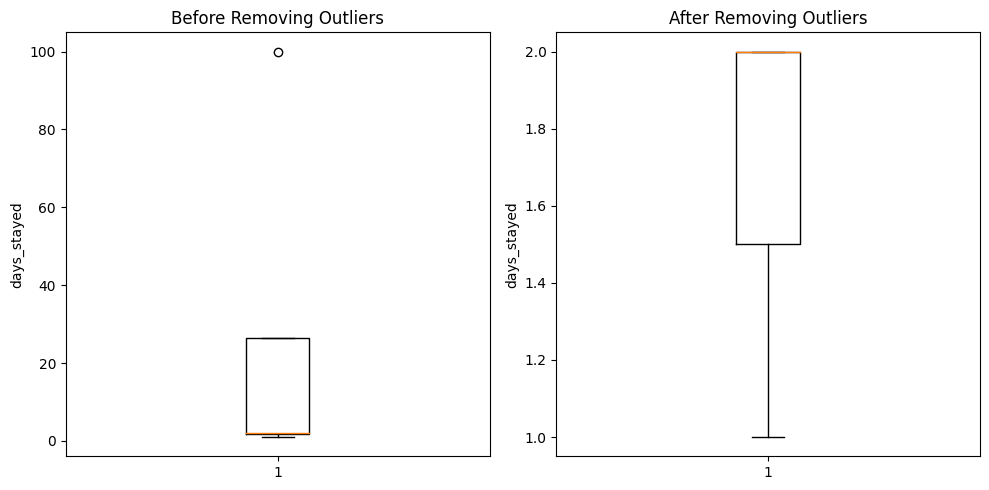

In [17]:
data = {
    'Admission Type': ['Emergency', 'Routine', 'Emergency', 'Routine'],
    'Medical Condition': ['Condition A', 'Condition B', 'Condition A', 'Condition C'],
    'Insurance Provider': ['Provider X', 'Provider Y', 'Provider X', 'Provider Z'],
    'Hospital': ['Hospital A', 'Hospital B', 'Hospital A', 'Hospital C'],
    'Medication': ['Medication X', 'Medication Y', 'Medication X', 'Medication Z'],
    'days_stayed': [1, 2, 2, 100]
}

df = pd.DataFrame(data)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['days_stayed'])
plt.title('Before Removing Outliers')
plt.ylabel('days_stayed')
Q1 = df['days_stayed'].quantile(0.25)
Q3 = df['days_stayed'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['days_stayed'] >= Q1 - 1.5 * IQR) & (df['days_stayed'] <= Q3 + 1.5 * IQR)]
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['days_stayed'])
plt.title('After Removing Outliers')
plt.ylabel('days_stayed')
plt.tight_layout()
plt.show()

In [18]:
print("Original Data Descriptive Statistics:")
print(df['days_stayed'].describe())

print("\nCleaned Data Descriptive Statistics:")
print(df_cleaned['days_stayed'].describe())


Original Data Descriptive Statistics:
count      4.000000
mean      26.250000
std       49.168927
min        1.000000
25%        1.750000
50%        2.000000
75%       26.500000
max      100.000000
Name: days_stayed, dtype: float64

Cleaned Data Descriptive Statistics:
count    3.000000
mean     1.666667
std      0.577350
min      1.000000
25%      1.500000
50%      2.000000
75%      2.000000
max      2.000000
Name: days_stayed, dtype: float64


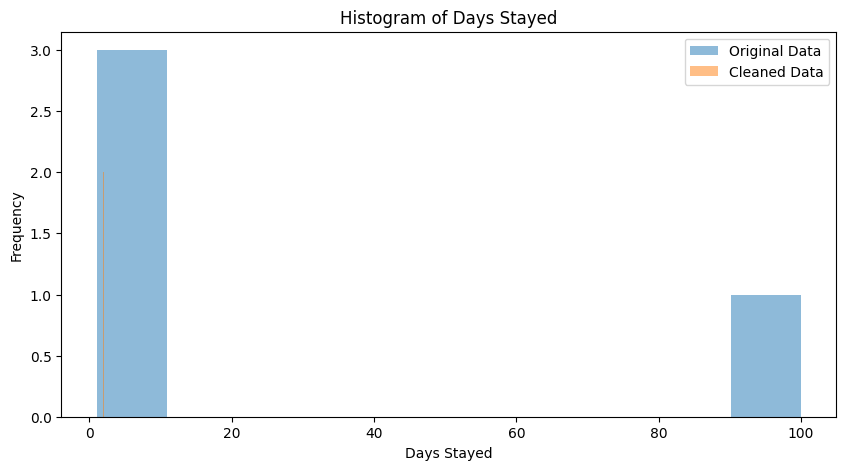

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(df['days_stayed'], bins=10, alpha=0.5, label='Original Data')
plt.hist(df_cleaned['days_stayed'], bins=10, alpha=0.5, label='Cleaned Data')
plt.legend()
plt.title('Histogram of Days Stayed')
plt.xlabel('Days Stayed')
plt.ylabel('Frequency')
plt.show()


In [34]:
data = {
    'Admission Type': ['Emergency', 'Routine', 'Emergency', 'Routine'],
    'Medical Condition': ['Condition A', 'Condition B', 'Condition A', 'Condition C'],
    'Insurance Provider': ['Provider X', 'Provider Y', 'Provider X', 'Provider Z'],
    'Hospital': ['Hospital A', 'Hospital B', 'Hospital A', 'Hospital C'],
    'Medication': ['Medication X', 'Medication Y', 'Medication X', 'Medication Z'],
    'days_stayed': [1, 2, 2, 100],
    'billing_amount': [200, 300, 250, 500]
}
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()
target_correlation = correlation_matrix['billing_amount']
target_correlation_with_days_stayed = target_correlation[['days_stayed', 'billing_amount']]
print(target_correlation_with_days_stayed)


days_stayed       0.95312
billing_amount    1.00000
Name: billing_amount, dtype: float64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [51]:
df.fillna(0, inplace=True)


In [52]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Remove duplicates if any
df = df.drop_duplicates()


Admission Type        0
Medical Condition     0
Insurance Provider    0
Hospital              0
Medication            0
days_stayed           0
billing_amount        0
dtype: int64
Admission Type        object
Medical Condition     object
Insurance Provider    object
Hospital              object
Medication            object
days_stayed            int64
billing_amount         int64
dtype: object


In [53]:
# Use One-Hot Encoding to convert categorical variables into dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [54]:
X = df_encoded.drop('billing_amount', axis=1)  # Features
y = df_encoded['billing_amount']               # Target variable


In [55]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the R² metric
r2_scores = cross_val_score(model, X, y, cv=3, scoring='r2')
print(f"Cross-validated R² scores: {r2_scores}")
print(f"Average R²: {r2_scores.mean()}")



Cross-validated R² scores: [-0.3786     nan     nan]
Average R²: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [56]:
# Check for missing values in each column
print(df.isnull().sum())

# Drop rows only if essential columns contain NaNs
df = df.dropna(subset=['days_stayed', 'billing_amount'])


Admission Type        0
Medical Condition     0
Insurance Provider    0
Hospital              0
Medication            0
days_stayed           0
billing_amount        0
dtype: int64


In [57]:
long_stays = df[df['days_stayed'] < 10]
print(long_stays)

  Admission Type Medical Condition Insurance Provider    Hospital  \
0      Emergency       Condition A         Provider X  Hospital A   
1        Routine       Condition B         Provider Y  Hospital B   
2      Emergency       Condition A         Provider X  Hospital A   

     Medication  days_stayed  billing_amount  
0  Medication X            1             100  
1  Medication Y            2             200  
2  Medication X            2             150  


In [58]:
# Summary of the data
print(df.describe(include='all'))


       Admission Type Medical Condition Insurance Provider    Hospital  \
count               4                 4                  4           4   
unique              2                 3                  3           3   
top         Emergency       Condition A         Provider X  Hospital A   
freq                2                 2                  2           2   
mean              NaN               NaN                NaN         NaN   
std               NaN               NaN                NaN         NaN   
min               NaN               NaN                NaN         NaN   
25%               NaN               NaN                NaN         NaN   
50%               NaN               NaN                NaN         NaN   
75%               NaN               NaN                NaN         NaN   
max               NaN               NaN                NaN         NaN   

          Medication  days_stayed  billing_amount  
count              4     4.000000        4.000000  
unique 

In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [45]:
y_pred = model.predict(X_test)
print("Predicted Billing Amounts:", y_pred)


Predicted Billing Amounts: [166.]


In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


Mean Squared Error: 1156.0
R-squared Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [59]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

# Perform GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

Best Parameters: {'max_depth': None, 'n_estimators': 50}


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the model with the best parameters
rf_model = RandomForestRegressor(max_depth=None, n_estimators=50, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error (MSE): 784.0
R-squared Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
